In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
uber = pd.read_csv('C:\\Users\\adefe\\Documents\\DataScienceProjects\\OnlineProjects\\Uber Data Analysis\\uber-raw-data-apr14.csv')
uber.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
uber.describe()

,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


In [4]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [5]:
#Checking missing values using fuction
def missing_num(x):
    return sum (x.isnull())

print('Number of missing/Null values per column')
print(uber.apply(missing_num, axis = 0))


Number of missing/Null values per column
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


In [6]:
#Convert to datetime
uber['Date/Time'] = pd.to_datetime(uber['Date/Time'], format = "%m/%d/%Y %H:%M:%S")
uber['DayofWeekNum'] = uber['Date/Time'].dt.dayofweek
uber['DayofWeek'] = uber['Date/Time'].dt.day_name()
uber['DayNum'] = uber['Date/Time'].dt.day 
uber['HourOfDay'] = uber['Date/Time'].dt.hour

In [7]:
uber.head()

,Date/Time,Lat,Lon,Base,DayofWeekNum,DayofWeek,DayNum,HourOfDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,1,0


In [8]:
uber.shape

(564516, 8)

In [9]:
uber.describe()

,Lat,Lon,DayofWeekNum,DayNum,HourOfDay
count,564516.000000,564516.000000,564516.00000,564516.000000,564516.000000
mean,40.740005,-73.976817,2.86698,16.117127,14.465043
std,0.036083,0.050426,1.82081,9.048139,5.873925
min,40.072900,-74.773300,0.00000,1.000000,0.000000
25%,40.722500,-73.997700,1.00000,8.000000,10.000000
50%,40.742500,-73.984800,3.00000,16.000000,16.000000
75%,40.760700,-73.970000,4.00000,24.000000,19.000000
max,42.116600,-72.066600,6.00000,30.000000,23.000000


In [10]:
uber['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

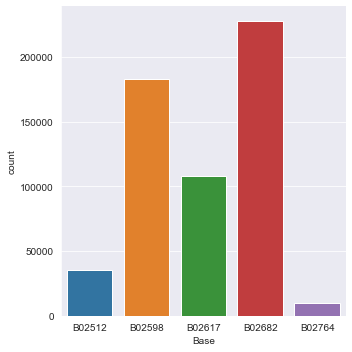

In [11]:
#Total rides based on base code
sns.catplot(x = 'Base', data = uber, kind = 'count')
plt.show()

In [12]:
uberWeekData= uber.pivot_table(index=['DayofWeekNum','DayofWeek'], values = 'Base', aggfunc = 'count')
uberWeekData

,,Base
DayofWeekNum,DayofWeek,
0,Monday,60861
1,Tuesday,91185
2,Wednesday,108631
3,Thursday,85067
4,Friday,90303
5,Saturday,77218
6,Sunday,51251


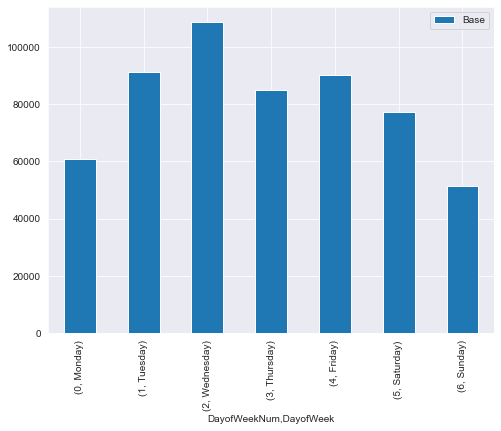

In [13]:
#Pivot table visualization
uberWeekData.plot(kind = 'bar', figsize= (8,6))
plt.show()

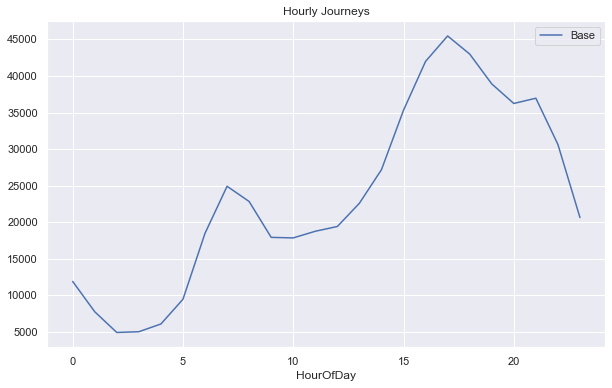

In [14]:
sns.set()
uberHourly = uber.pivot_table(index= ['HourOfDay'], values = 'Base', aggfunc = 'count')
uberHourly.plot(kind='line', figsize=(10,6), title= 'Hourly Journeys' )
plt.show()

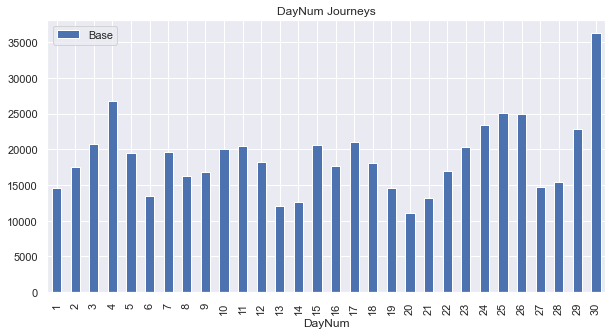

In [15]:
sns.set()
uberHourly = uber.pivot_table(index= ['DayNum'], values = 'Base', aggfunc = 'count')
uberHourly.plot(kind='bar', figsize=(10,5), title= 'DayNum Journeys' )
plt.show()

In [16]:
#Number of trips made daily
def count_rows(rows):
    return len(rows)

by_date = uber.groupby('DayNum').apply(count_rows)
by_date

DayNum
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [17]:
#Sort Day of the month by values rather than date
date_sorted = by_date.sort_values()
date_sorted

DayNum
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

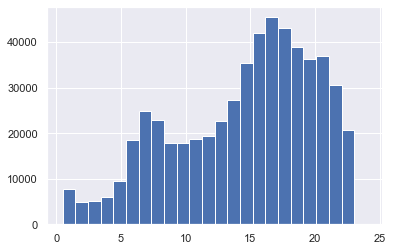

In [18]:
#Analyze hours

plt.hist(uber.HourOfDay, bins = 24, range =(.5,24))
plt.show()

In [19]:
# Trips |AM|Day of week
count_rows(uber)
hour_weekday = uber.groupby('HourOfDay DayofWeekNum'.split()).apply(count_rows).unstack()
hour_weekday

DayofWeekNum,0,1,2,3,4,5,6
HourOfDay,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


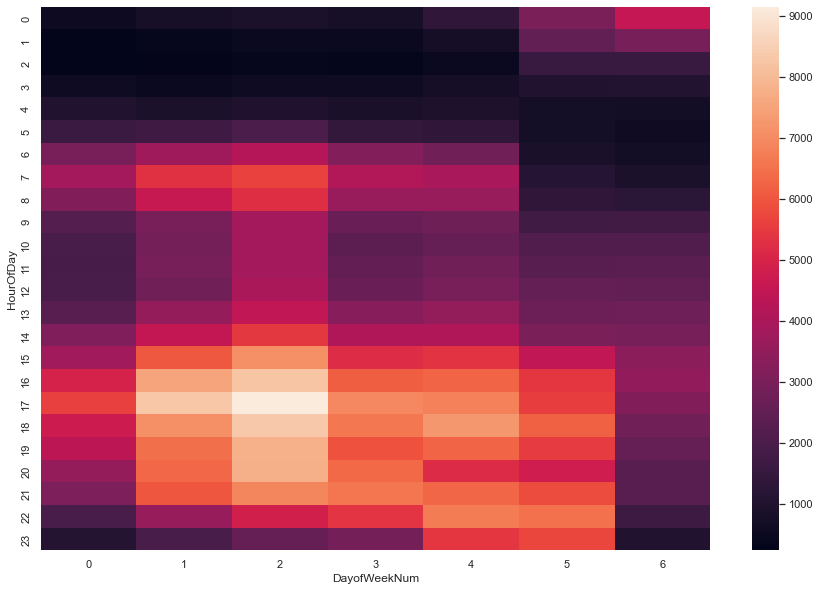

In [20]:
#Day/Hour with highest frequency
plt.figure(figsize=(15, 10))
sns.heatmap(hour_weekday)
plt.show()